# Notebook for results analysis of GAN training. 

In [1]:
#Import of necessary packages and memory allocation.
!export PATH=/softs/anaconda3/envs/tf1.12-cuda10-py36/bin/:$PATH
%matplotlib inline

import tensorflow as tf
import keras 
from keras import backend as K
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
#config.gpu_options.visible_device_list = str(1)
set_session(tf.Session(config=config))
import time
import h5py as h5
import pandas as pd
from keras.models import load_model
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

import sys
import seaborn as sns
import math
from sklearn.decomposition import PCA


import cartopy
import cartopy.crs as ccrs
import cartopy.util


import spharm
import numpy as np
#s = np.random.seed(1)

/Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.d

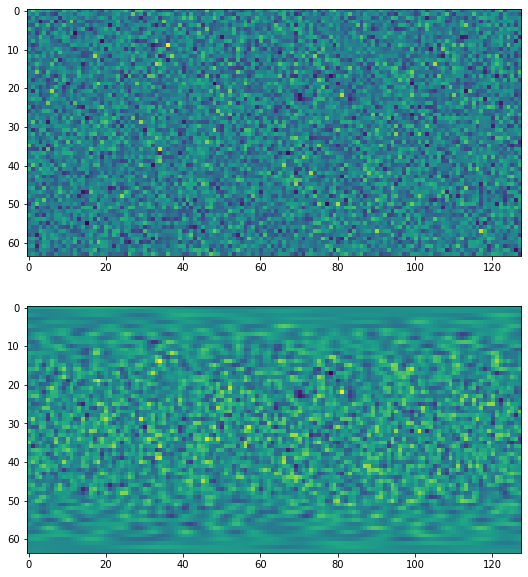

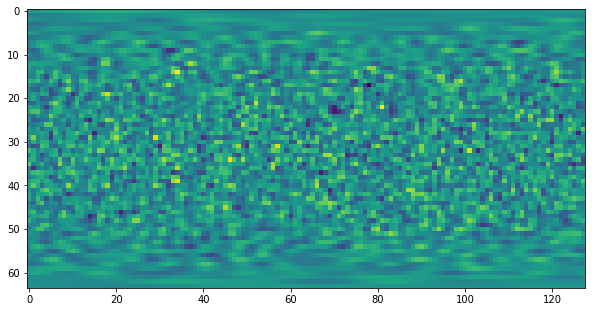

In [2]:
field = np.random.normal(0,1, (64, 128))
x = spharm.Spharmt(128, 64, rsphere=6.4e6, gridtype='gaussian', legfunc='computed')

spec = x.grdtospec(field)

field_2 = x.spectogrd(spec)

#plt.figure(figsize=(10,10))
fig, ax = plt.subplots(2,1, figsize=(10,10))
ax[0].imshow(field)
ax[1].imshow(field_2)
#plt.colorbar()

plt.figure(figsize=(10,10))
plt.imshow(field_2)
#plt.colorbar()


W1202 16:41:52.929260 4653870528 deprecation_wrapper.py:119] From /Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1202 16:41:52.972730 4653870528 deprecation_wrapper.py:119] From /Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1202 16:41:52.974192 4653870528 deprecation_wrapper.py:119] From /Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1202 16:41:52.975344 4653870528 deprecation_wrapper.py:119] From /Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/li

[  0.       2.8125   5.625    8.4375  11.25    14.0625  16.875   19.6875
  22.5     25.3125  28.125   30.9375  33.75    36.5625  39.375   42.1875
  45.      47.8125  50.625   53.4375  56.25    59.0625  61.875   64.6875
  67.5     70.3125  73.125   75.9375  78.75    81.5625  84.375   87.1875
  90.      92.8125  95.625   98.4375 101.25   104.0625 106.875  109.6875
 112.5    115.3125 118.125  120.9375 123.75   126.5625 129.375  132.1875
 135.     137.8125 140.625  143.4375 146.25   149.0625 151.875  154.6875
 157.5    160.3125 163.125  165.9375 168.75   171.5625 174.375  177.1875
 180.     182.8125 185.625  188.4375 191.25   194.0625 196.875  199.6875
 202.5    205.3125 208.125  210.9375 213.75   216.5625 219.375  222.1875
 225.     227.8125 230.625  233.4375 236.25   239.0625 241.875  244.6875
 247.5    250.3125 253.125  255.9375 258.75   261.5625 264.375  267.1875
 270.     272.8125 275.625  278.4375 281.25   284.0625 286.875  289.6875
 292.5    295.3125 298.125  300.9375 303.75   306.5

W1202 16:41:53.010476 4653870528 deprecation_wrapper.py:119] From /Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W1202 16:41:53.234394 4653870528 deprecation_wrapper.py:119] From /Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.

/Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Database loading...
Database loaded.
Scaling...
Scaled
Generating samples...
Samples generated.
scaling...
scaled.
(64, 128)
(1, 64, 129) 129
[[ 87.86379884  87.86379884  87.86379884 ...  87.86379884  87.86379884
   87.86379884]
 [ 85.09652699  85.09652699  85.09652699 ...  85.09652699  85.09652699
   85.09652699]
 [ 82.31291295  82.31291295  82.31291295 ...  82.31291295  82.31291295
   82.31291295]
 ...
 [-82.31291295 -82.31291295 -82.31291295 ... -82.31291295 -82.31291295
  -82.31291295]
 [-85.09652699 -85.09652699 -85.09652699 ... -85.09652699 -85.09652699
  -85.09652699]
 [-87.86379884 -87.86379884 -87.86379884 ... -87.86379884 -87.86379884
  -87.86379884]] (64, 129)
(64, 129)
(64, 128)


W1202 16:42:14.060416 4653870528 registry.py:293] Calling the getitem method from a UnitRegistry is deprecated. use `parse_expression` method or use the registry as a callable.


<xarray.DataArray (lat: 64, lon: 129)>
array([[4957.65966415, 4958.40477519, 4959.07420433, ..., 4955.93064424,
        4956.83546928, 4957.65966415],
       [5027.76805243, 5027.72753853, 5027.42918485, ..., 5026.78467374,
        5027.47703278, 5027.76805243],
       [5084.22511395, 5080.60060047, 5076.52685551, ..., 5088.29784275,
        5086.94630454, 5084.22511395],
       ...,
       [5037.81691199, 5035.7002046 , 5033.43747931, ..., 5040.74853626,
        5039.58154171, 5037.81691199],
       [5043.81690044, 5043.15233119, 5042.21582845, ..., 5044.29979778,
        5044.20361594, 5043.81690044],
       [5020.70750124, 5019.68992653, 5018.59472596, ..., 5022.51025908,
        5021.6474501 , 5020.70750124]])
Coordinates:
  * lon      (lon) object 0.0 degree 2.8125 degree ... 360.0 degree
  * lat      (lat) float64 87.86 85.1 82.31 79.53 ... -79.53 -82.31 -85.1 -87.86


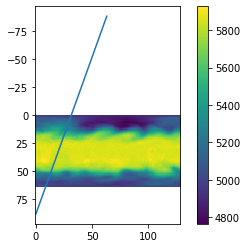

In [3]:



## Loading Data

#########
multi_train = True  #If the training was in multiple run : True
plot_var = True     #True: plot all cells result ; False : manualy change if plot_var in if True: to plot
save = False         
scale = True
#########
N_fields = 82      #Number of fields == Number of channels in generated tensor. 
N_lvls = 10         #Number of pressure level for 3D variable. 

years = 14
N_train = 360*years
N_gen = 1*years     #Number of generation used for statistic analysis /!\ Memory usage important /!\
scaled = True

#indxs = np.random.randint(0,1000,N_gen)
#ind = indxs[0]
#########
lon = np.genfromtxt('../data/raw/lon.csv', delimiter=',')

lons = np.genfromtxt('../data/raw/lon.csv', delimiter=',')
lats = np.genfromtxt('../data/raw/lat.csv', delimiter=',')

print(lons)
print(np.gradient(lons))
print(lats)
print(np.gradient(lats))
lon_idx = [16,16,32,48]                    #France, north america, ecuador, south america
lat_idx = [5,106,106,106]                  #France, north america, ecuador, south america
fnes = [[16,5],[16,106],[32,106],[48,106]] #Coordinate for distribution comparison at different locations.
L_ind = ['a','b','c','d']


if N_fields==82:
    runnumber_0 = 'RESNET_V8_82l'
    runnumber_1, stop1 = 'RESNET_V8_82l_continue1', 8000 #Name of the generator save file for the 1st restart
    runnumber_2, stop2 = 'RESNET_V8_82l_continue2', 15500 #Name of the generator save file for the 2nd restart
    runnumber_3, stop3 = 'RESNET_V8_82l_continue3b', 23250
    runnumber_4, stop4 = 'RESNET_V8_82l_continue4', 31000
    runnumber = runnumber_4 #Most recent save
elif N_fields==22:
    runnumber_0 = 'RESNET_V8_gual_Gbn'
    runnumber = runnumber_0 #Most recent save



sys.path.append('../src/modeling')

sys.path.append('../src/preprocessing')

sys.path.append('../src/preparation')
from SpectralNormalizationKeras import *
from custom_classes import *
from data_preproc import *

try:
    gen = load_model(f'../model/save/{runnumber}/{runnumber}_generator.h5',custom_objects = {'NearestPadding2D': NearestPadding2D,'WrapPadding2D': WrapPadding2D, 'DenseSN' :DenseSN, 'ConvSN2D': ConvSN2D})
except:
    gen = load_model(f'../model/{runnumber}_generator.h5',
          custom_objects = {'NearestPadding2D': NearestPadding2D,'WrapPadding2D': WrapPadding2D, 'DenseSN' :DenseSN, 'ConvSN2D': ConvSN2D})
gen._make_predict_function()

print('Database loading...')

if N_fields==82:
    f=h5.File('/Users/besombes/Work/python/Cerfacs/Dataset/T42_plasim_100y_10lay_scaled.h5','r')
    _X_train = f['dataset']
    scaling = np.transpose(f['scaling'])
elif N_fields==22:
    X_train = np.load('../data/raw/x_train_22c_scaled.npy')
    scaling = np.load('../data/raw/scaling_21c.npy')
    
print('Database loaded.')
print('Scaling...')
#if scaled:
#    X_train = np.multiply(_X_train[:N_train,:,:,:],
#                          scaling[np.newaxis,:,1]) + scaling[np.newaxis,:,0]
#else:
#    X_train = _X_train[:N_train]
print('Scaled')

print('Generating samples...')

z = np.random.normal(0,1,(N_gen,64))
fk_imgs = gen.predict(z)
print('Samples generated.')
print('scaling...')
if scaled:
    fk_imgs = np.multiply(fk_imgs[:,:,:,:-1],
                          scaling[np.newaxis,:,1]) + scaling[np.newaxis,:,0]
print('scaled.')


#noise_ = np.load('./fig_82c/noise_.npy')
#im = gen.predict(noise_)
#im_sc = np.multiply(im[:,:,:,:-1],
#                    scaling[np.newaxis,:,1]) + scaling[np.newaxis,:,0]




noise_ = np.load('../data/raw/noise_.npy')
im = gen.predict(noise_)
image = np.multiply(im[:,:,:,:-1],
                          scaling[np.newaxis,:,1]) + scaling[np.newaxis,:,0]
image.shape
#im_sc = np.multiply(im[:,:,:,:-1],
#                    scaling[np.newaxis,:,1]) + scaling[np.newaxis,:,0]

ind = 4115
#print(lons)
#lons = np.genfromtxt('/scratch/coop/besombes/Puma_Project/data/raw/lon.csv', delimiter=',')
#lons_n = np.genfromtxt('/scratch/coop/besombes/Puma_Project/data/raw/lon.csv', delimiter=',')
#lats = np.genfromtxt('/scratch/coop/besombes/Puma_Project/data/raw/lat.csv', delimiter=',')

X_train = np.multiply(_X_train[ind:ind+1,:,:,:],
                      scaling[np.newaxis,:,1]) + scaling[np.newaxis,:,0]
print(X_train[0,:,:,74].shape)
geopot, lons = cartopy.util.add_cyclic_point(X_train[:,:,:,74], coord=lons, axis=2)
print(geopot.shape, len(lons))
phi, theta = np.meshgrid(lons,lats)
print(theta, phi.shape)

plt.imshow(geopot[0,:,:])
plt.colorbar()

from metpy.units import units
import metpy as mt
from pint import UnitRegistry
import metpy.calc as mpcalc
import xarray as xr
from pyproj import CRS


ureg = UnitRegistry()
lats_p = lats*ureg.deg
lons_p = lons*ureg.deg

plt.plot(lats)
#lats_p.dims = units.deg
#lons_p.dims = units.deg

phi, theta = np.meshgrid(lons,lats)*ureg.deg

#f = 2.*7.2921e-5*np.sin(theta*np.pi/180.)/ureg.second




#dy = dy*units.meters
#dx = dx*units.meters

#print(dx.dim, dy)
f = mpcalc.coriolis_parameter(theta)
#f, lons = cartopy.util.add_cyclic_point(f, coord=lon, axis=1)

dx, dy = mpcalc.lat_lon_grid_deltas(phi, theta)

print(f.shape)
#f = np.repeat(f, 129, axis=1 )
print(dx.shape)

#lat, lon = xr.broadcast(lats_p, lons_p)
heights = geopot*ureg.hPa
heights = xr.DataArray(geopot[0,:,:]*units['hPa'], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
print(heights)



#heights = geopot.metpy.loc[{'vertical': 500. * units.hPa}]
u_geo, v_geo = mpcalc.geostrophic_wind(heights, f, dx, dy)



[[16.85542133357733 16.986398486176586 17.078426100786327 ...  16.5518000126452 16.70368662769921 16.85542133357733] [13.847802405511578 13.371817324327607 12.854993251122659 ...  14.479406359405285 14.233868525128452 13.847802405511578] [8.474907413061413 7.455083786879759 6.526913067730964 ...  10.186954443761824 9.43549286398811 8.474907413061413] ... [-1.070999666247088 -1.8113912904864073 -2.5520218236425034 ...  0.09975819492454478 -0.4065829343291396 -1.070999666247088] [1.889531089579876 1.7705110952019856 1.6438067607151292 ...  2.010538150536895 1.9784606463502374 1.889531089579876] [8.223047955043741 8.49610293809477 8.691838366889096 ...  7.525154528705663 7.8924237990899275 8.223047955043741]] / second
[[16.85542133 16.98639849 17.0784261  ... 16.55180001 16.70368663
  16.85542133]
 [13.84780241 13.37181732 12.85499325 ... 14.47940636 14.23386853
  13.84780241]
 [ 8.47490741  7.45508379  6.52691307 ... 10.18695444  9.43549286
   8.47490741]
 ...
 [-1.07099967 -1.81139129 -

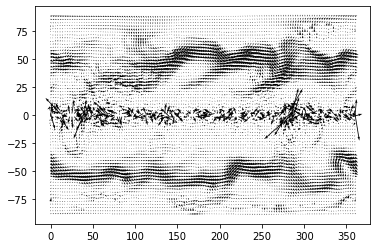

In [4]:
print(u_geo)
print(u_geo.m)

plt.quiver(phi, theta, u_geo, v_geo)


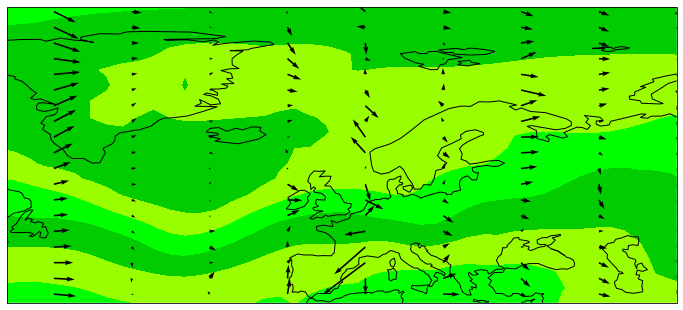

In [5]:

#extent=[-60, 60, 35, 90]
#fig, axc = plt.subplots(nrows = 2, ncols = 1, figsize=(15,20),
#            subplot_kw={'projection': ccrs.PlateCarree(central_longitude = 0.)})
##plt.subplots_adjust(top=0.9, bottom=0.001,right=0.89, left=0.1, wspace=0.1, hspace=0.1)
#axc[0].set_extent(extent, crs=ccrs.PlateCarree())
##axc[0].coastlines(linewidth = 3.)
#pgeo = axc[0].quiver(phi, theta, 
#                     u_geo, v_geo)
##                     transform=ccrs.PlateCarree(central_longitude=360.))

# Or, let's make a full 500 hPa map with heights, temperature, winds, and humidity
import cartopy.feature as cfeature
# Select the data for this time and level
#data_level = data.metpy.loc[{time.name: time[0], vertical.name: 500. * units.hPa}]
extent=[-60, 60, 35, 88]
# Create the matplotlib figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree(central_longitude = 0.)})
ax.set_extent(extent, crs=ccrs.PlateCarree())
# Plot RH as filled contours
rh = ax.contourf(phi, theta, geopot[0,:,:],
                 colors=['#99ff00', '#00ff00', '#00cc00'])

# Plot wind barbs, but not all of them
wind_slice = slice(5, -5, 5)
ax.quiver(theta[wind_slice], phi[wind_slice],
         u_geo[wind_slice],
         v_geo[wind_slice])

# Plot heights and temperature as contours
#h_contour = ax.contour(x, y, data_level['height'], colors='k', levels=range(5400, 6000, 60))
#h_contour.clabel(fontsize=8, colors='k', inline=1, inline_spacing=8,
#                 fmt='%i', rightside_up=True, use_clabeltext=True)
#t_contour = ax.contour(x, y, data_level['temperature'], colors='xkcd:deep blue',
#                       levels=range(-26, 4, 2), alpha=0.8, linestyles='--')
#t_contour.clabel(fontsize=8, colors='xkcd:deep blue', inline=1, inline_spacing=8,
#                 fmt='%i', rightside_up=True, use_clabeltext=True)
#
# Add geographic features
ax.coastlines()

# Set a title and show the plot


# Geostrophic Wind

## Wikipedia 
Le vent géostrophique se définit comme le vent qui résulterait de l'équilibre géostrophique entre la force de Coriolis et la force du gradient de pression atmosphérique agissant sur une parcelle d'air. Ce vent soufflerait parallèlement aux isobares dans l'atmosphère. La plus grande partie de l'écoulement atmosphérique, au-dessus de la couche limite en dehors des tropiques, est proche de l'équilibre géostrophique, ce qui en fait une approximation communément utilisée en météorologie. Toutefois, cet équilibre est rarement exact, en raison d'autres forces qui agissent sur le vent comme la friction (près du sol) ou la force centrifuge dans un écoulement courbé.

Le vent agéostrophique ($v_a)$ est la composante du vent total qui diffère de l'équilibre géostrophique $(v_g)^2$. Il est donc défini par3 : ${\displaystyle {\vec {v}}_{a}={\vec {v}}_{reel}-{\vec {v}}_{g}}{\displaystyle {\vec {v}}_{a}={\vec {v}}_{reel}-{\vec {v}}_{g}}$.

Les composantes agéostrophiques du vent à l'échelle synoptique sont relativement petites, et peuvent être négligées en première approximation dans un contexte diagnostique. Toutefois elles sont cruciales dans l'évolution future de l'écoulement car elles dénotent la présence de forçages qui créent de la convergence ou de la divergence dans l'écoulement, produisant ainsi le mouvement vertical à l'origine de plusieurs phénomènes météorologiques, dont les dépressions des latitudes moyennes4,5.

Près de la surface, l'effet de la friction entre l'air et la surface perturbe l'équilibre géostrophique. La friction ralentit l'écoulement, réduisant ainsi la force de Coriolis. Dans ce nouvel équilibre à trois forces, l'effet de la force de Coriolis n'est plus suffisant pour forcer l'écoulement à être parallèle aux isobares et une partie du mouvement résultant s'aligne vers la zone de basse pression. Ainsi, près de la surface, l'écoulement horizontal prend la forme d'une spirale convergente vers le centre des dépressions et divergente du centre des anticyclones et donne la spirale d'Ekman.

Finalement d'autres effets s'ajoutent dont la composante isallobarique due au déplacement et au creusement du système météorologique, le vent de gradient dans les vallées, etc.

[[1 2 3]
 [4 5 6]]
[1 2 3]
[[3. 3. 3.]
 [3. 3. 3.]] [[1. 1. 1.]
 [1. 1. 1.]]


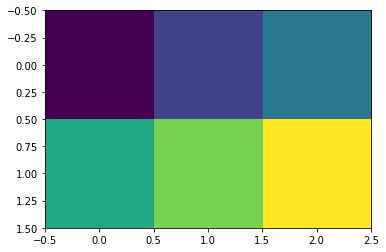

In [6]:
xx = np.array([[1,2,3], [4,5,6]])
print(xx)
print(xx[0,:])
[gx, gy] = np.gradient(xx)
print(gx, gy)

plt.figure()
plt.imshow(xx)

On néglige l'effet de la friction, ce qui est permis à une très bonne approximation à l'échelle synoptique dans l'atmosphère libre aux latitudes moyennes. On néglige aussi la composante agéostrophique décrite plus haut qui est due aux différents facteurs décrits.

On peut obtenir le vent géostrophique ${\displaystyle (u_{g},v_{g})}{\displaystyle (u_{g},v_{g})}$ des équations primitives atmosphériques en utilisant l'approximation quasi-géostrophique6 :

${\displaystyle u_{g}=-{g \over f}{\partial Z \over \partial y}}$ ; 
${\displaystyle v_{g}={g \over f}{\partial Z \over \partial x}}$
Où g est l'accélération gravitationnelle (9,81 m s−2), f est le paramètre de Coriolis (variable avec la latitude), et Z est la hauteur géopotentielle. La validité de cette approximation dépend du nombre de Rossby à l'endroit où on veut l'appliquer. Elle est invalide à l'équateur car f y est égal à zéro. On évite généralement d'utiliser cette approximation dans les tropiques.

D'autres variantes de cette équation existent, par exemple en utilisant le champ de pression au lieu de Z. Dans ce cas, l'expression est un peu plus complexe.

In [40]:
def geo_wind_explained(geopot1, geopot2, lon, lats, atm_lvl, scale=10, lvls=10, extent=None, method_ageo='metpy',
                      quiver_slices = slice(None, None, 1)):
    from metpy.units import units
    geopot, lons = cartopy.util.add_cyclic_point(geopot1, coord=lon, axis=2)
    geopot = geopot
    phi, theta = np.meshgrid(lons,lats)
    
    ureg = UnitRegistry()
    lats_p = lats*ureg.deg
    lons_p = lons*ureg.deg

    phi, theta = np.meshgrid(lons,lats)*ureg.deg
    
    f = mpcalc.coriolis_parameter(theta)

    dx, dy = mpcalc.lat_lon_grid_deltas(phi, theta)

    heights = geopot*ureg.hPa
    heights = xr.DataArray(geopot[0,:,:, 70+atm_lvl]*units['hPa'], dims=("lat", "lon"),
                           coords={"lon": lons_p, "lat" : lats_p})
    
    u_geo, v_geo = mpcalc.geostrophic_wind(heights, f, dx, dy, dim_order='yx')
    
    
    u_wind = geopot[0,:,:,10+atm_lvl]
    v_wind = geopot[0,:,:,20+atm_lvl]
    ageo_wind_u = u_wind - u_geo.m
    ageo_wind_v = v_wind - v_geo.m
    
    if method_ageo == 'metpy':
        
        u = xr.DataArray(geopot[0,:,:, 10+atm_lvl], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
        v = xr.DataArray(geopot[0,:,:, 20+atm_lvl], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
        
        u = u * units.meter / units.second
        v = v * units.meter / units.second
        
        #print(u)
        u_ageo, v_ageo = mpcalc.ageostrophic_wind(heights, f, dx, dy, u, v)
        ageo_wind_u = u_ageo.m
        ageo_wind_v = v_ageo.m
    else:
        ageo_wind_u = u_wind - u_geo.m
        ageo_wind_v = v_wind - v_geo.m


    
    quiver_kwargs = {'headlength': 3, 'headwidth': 3, 'angles': 'xy', 'scale_units': 'xy',
                 'scale': scale}
    quiver_kwargs2 = {'headlength': 3, 'headwidth': 3, 'angles': 'xy', 'scale_units': 'xy',
                 'scale': scale}
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(20,12.5),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude = 0.)})
    plt.subplots_adjust(top=0.9, bottom=0.001,right=0.89, left=0.250, wspace=0.1, hspace=0.1)
    axc=ax[0]
    if extent is not None:
        axc.set_extent(extent, crs=ccrs.PlateCarree(central_longitude=0.))
    axc.coastlines(linewidth = 3.)
    axc.set_title('(a)', fontsize = 24, fontweight='bold')
    
    cim1 = axc.contour(lons, lats, geopot[0,:,:,70+atm_lvl], levels = lvls, cmap = 'viridis',
                       transform=ccrs.PlateCarree(central_longitude=360.))


    alpha = 1.
    geo = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                     u_geo[quiver_slices, quiver_slices].m, v_geo[quiver_slices, quiver_slices].m, alpha=alpha,
                     color='darkorchid', **quiver_kwargs2, transform=ccrs.PlateCarree(central_longitude=360.))
    
    ageo = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                      ageo_wind_u[quiver_slices, quiver_slices], ageo_wind_v[quiver_slices, quiver_slices],
                      alpha=alpha, color='red', **quiver_kwargs,
                      transform=ccrs.PlateCarree(central_longitude=360.))
    
    wind = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                 u_wind[quiver_slices, quiver_slices], v_wind[quiver_slices, quiver_slices], alpha=alpha,
                 color='blue', **quiver_kwargs, transform=ccrs.PlateCarree(central_longitude=360.))
    
    norm_w = np.sqrt(u_wind**2+v_wind**2)
    norm_g = np.sqrt(u_geo**2+v_geo**2)
    norm_a = np.sqrt(ageo_wind_u**2+ageo_wind_v**2)
    relative_err_data = norm_a/norm_w
    print('norm ratio btw ageo and wind for dataset :\n', np.mean(relative_err_data[16,120:]))

    
    ##############################################################################
    
    
    geopot, lons = cartopy.util.add_cyclic_point(geopot2, coord=lon, axis=2)
    geopot = geopot
    phi, theta = np.meshgrid(lons,lats)
    
    ureg = UnitRegistry()
    lats_p = lats*ureg.deg
    lons_p = lons*ureg.deg

    phi, theta = np.meshgrid(lons,lats)*ureg.deg
    #print('phi', phi)
    f = mpcalc.coriolis_parameter(theta)

    dx, dy = mpcalc.lat_lon_grid_deltas(phi, theta)

    heights = geopot*ureg.hPa
    heights = xr.DataArray(geopot[0,:,:, 70+atm_lvl]*units['hPa'], dims=("lat", "lon"),
                           coords={"lon": lons_p, "lat" : lats_p})
    
    u_geo, v_geo = mpcalc.geostrophic_wind(heights, f, dx, dy)
    
    
    u_wind = geopot[0,:,:,10+atm_lvl]
    v_wind = geopot[0,:,:,20+atm_lvl]
    ageo_wind_u = u_wind - u_geo.m
    ageo_wind_v = v_wind - v_geo.m
    
    if method_ageo == 'metpy':
        
        u = xr.DataArray(geopot[0,:,:, 10+atm_lvl], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
        v = xr.DataArray(geopot[0,:,:, 20+atm_lvl], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
        
        u = u * units.meter / units.second
        v = v * units.meter / units.second
        
        #print(u)
        u_ageo, v_ageo = mpcalc.ageostrophic_wind(heights, f, dx, dy, u, v)
        ageo_wind_u = u_ageo.m
        ageo_wind_v = v_ageo.m
    else:
        ageo_wind_u = u_wind - u_geo.m
        ageo_wind_v = v_wind - v_geo.m


    axc=ax[1]
    if extent is not None:
        axc.set_extent(extent, crs=ccrs.PlateCarree(central_longitude=0.))
    axc.coastlines(linewidth = 3.)
    axc.set_title('(b)', fontsize = 24, fontweight='bold')
    
    cim2 = axc.contour(lons, lats, geopot[0,:,:,70+atm_lvl], levels = lvls, cmap = 'viridis', linewidth=(7,),
                       transform=ccrs.PlateCarree(central_longitude=360.))



    alpha = 1.
    geo = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                    u_geo[quiver_slices, quiver_slices].m, v_geo[quiver_slices, quiver_slices].m, alpha=alpha,
                    color='darkorchid', **quiver_kwargs2, transform=ccrs.PlateCarree(central_longitude=360.))
    
    ageo = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                     ageo_wind_u[quiver_slices, quiver_slices], ageo_wind_v[quiver_slices, quiver_slices], alpha=alpha,
                     color='red', **quiver_kwargs, transform=ccrs.PlateCarree(central_longitude=360.))
    
    wind = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                 u_wind[quiver_slices, quiver_slices], v_wind[quiver_slices, quiver_slices], alpha=alpha,
                 color='blue', **quiver_kwargs, transform=ccrs.PlateCarree(central_longitude=360.))
    

    
    norm_w = np.sqrt(u_wind**2+v_wind**2)
    norm_g = np.sqrt(u_geo**2+v_geo**2)
    norm_a = np.sqrt(ageo_wind_u**2+ageo_wind_v**2)
    #
    relative_err_gen = norm_a/norm_w
    print('norm ratio btw ageo and wind for generated fields :\n', np.mean(relative_err_gen[16,120:]))

    posn2 = axc.get_position()
    cax22 = fig.add_axes([posn2.x0 - 3*0.008, posn2.y0, 2*0.008, 2.34*posn2.height])
    norm= matplotlib.colors.Normalize(vmin=cim2.cvalues.min(), vmax=cim2.cvalues.max())
    sm = plt.cm.ScalarMappable(norm=norm, cmap = cim2.cmap)
    fig.colorbar(sm, ticks=cim2.levels, cax=cax22)
    #cbar = plt.colorbar(cim1, cax = cax22)
    #cbar.set_label(label='Geopotential height', size='large', weight='bold')
    cax22.tick_params(labelsize=25)
    cax22.set_ylabel('Geopotential height (gpm)', fontsize=22, labelpad=-116)
    plt.suptitle(f"Geopotential and wind with \n geostrophic and ageostrophic components at z{atm_lvl+1}00",
                 fontsize=27, fontweight='bold')
    cax22.yaxis.set_ticks_position('left')
    #cax22.yaxis.set_label_position('left')
    axc.legend([geo,ageo,wind],['Geostrophic wind', 'Ageostrophic wind','wind'], loc=6,
               bbox_to_anchor=(0.74, posn2.y0+posn2.height*0.39, 2., 2.), fontsize = 22)
    plt.savefig('../figures/quiver_winds.pdf')  
    return relative_err_data, relative_err_gen

W1203 10:07:20.286949 4653870528 registry.py:293] Calling the getitem method from a UnitRegistry is deprecated. use `parse_expression` method or use the registry as a callable.


norm ratio btw ageo and wind for dataset :
 0.22944512306594522


W1203 10:07:55.647706 4653870528 registry.py:293] Calling the getitem method from a UnitRegistry is deprecated. use `parse_expression` method or use the registry as a callable.
/Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


norm ratio btw ageo and wind for generated fields :
 0.8159568422127601


(masked_array(
   data=[[0.4145434708114067, 0.4090922346274987, 0.402620315046628, ...,
          0.42690438403632563, 0.4197203430478873, 0.414420206281864],
         [0.12902800825850863, 0.13731670264446272, 0.14457530810211375,
          ..., 0.07640923560300049, 0.10152846217986047,
          0.12868890791255488],
         [0.25205131022354044, 0.3037419736963448, 0.34301342180823036,
          ..., 0.11863239166967311, 0.10249091938760489,
          0.2529688992032906],
         ...,
         [0.05634537418010967, 0.17203517522037087, 0.3517172382573639,
          ..., 0.7320306568363357, 0.3959907515237042,
          0.048217772224536416],
         [0.7628813202954957, 0.6405095218698545, 0.5718566679825121, ...,
          1.0806740437717197, 0.9178184346139517, 0.7608499446644387],
         [0.6728432485014676, 0.7383632871781589, 0.7976729650338654, ...,
          0.5392235735976816, 0.605134793322076, 0.6726537957450327]],
   mask=[[False, False, False, ..., False, False, Fa

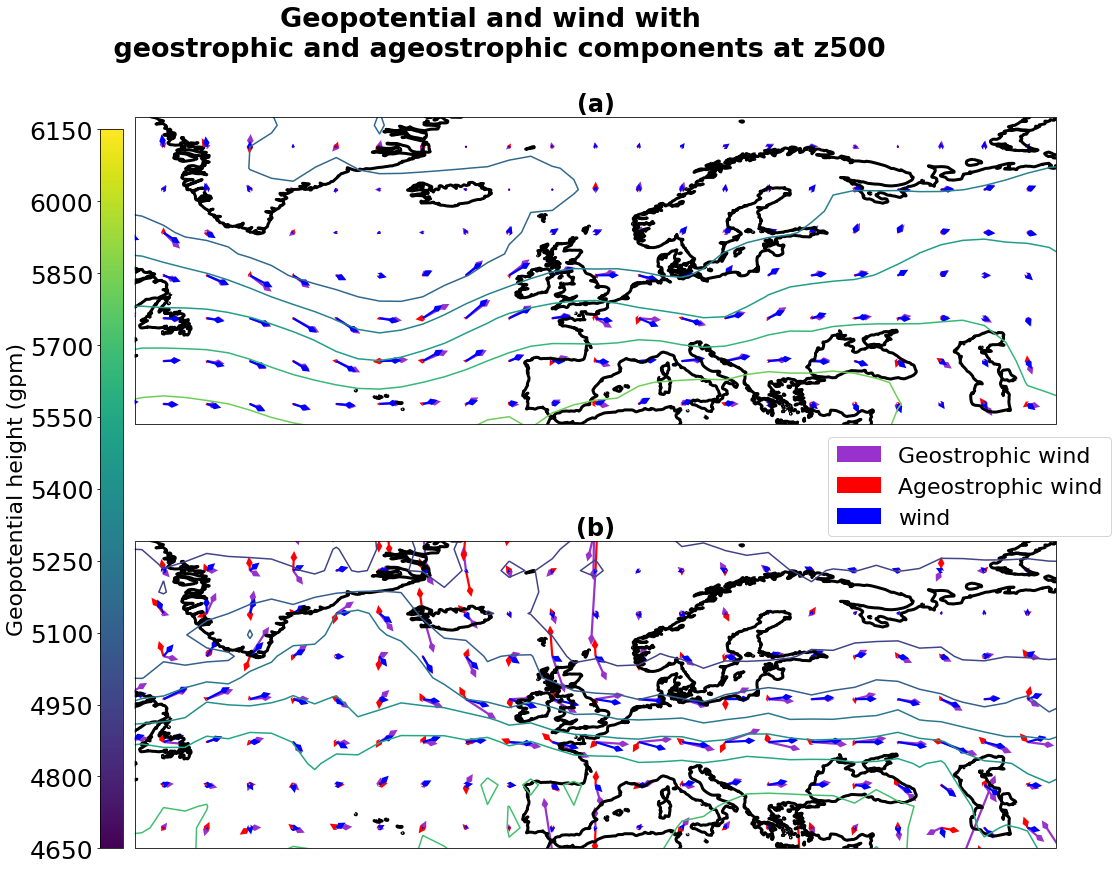

In [41]:
#lon = np.genfromtxt('/scratch/coop/besombes/Puma_Project/data/raw/lon.csv', delimiter=',')
#lat = np.genfromtxt('/scratch/coop/besombes/Puma_Project/data/raw/lat.csv', delimiter=',')
extent = [-60, 60, 35, 75]
noise_ = np.load('../data/raw/noise_.npy')
im = gen.predict(noise_)
#im = gen.predict(np.random.normal(0,1,(1,64)))
image = np.multiply(im[:,:,:,:-1],
                    scaling[np.newaxis,:,1]) + scaling[np.newaxis,:,0]
geo_wind_explained(X_train, image, lon, lats, atm_lvl=4,
                   scale=10, lvls=10, extent=extent, method_ageo='', quiver_slices = slice(None, -1, 2))

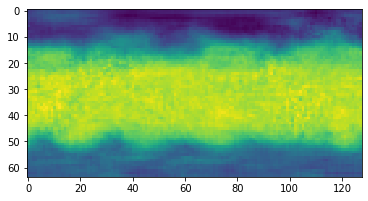

In [29]:
noise_ = np.load('../data/raw/noise_.npy')
im = gen.predict(noise_)
#im = gen.predict(np.random.normal(0,1,(1,64)))
image = np.multiply(im[:,:,:,:-1],
                          scaling[np.newaxis,:,1]) + scaling[np.newaxis,:,0]
plt.imshow(image[0,:,:,74])
image2=np.copy(image)

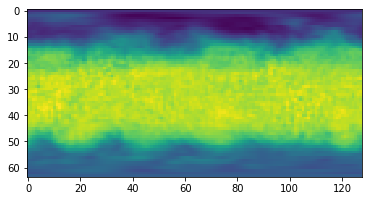

In [10]:
x = spharm.Spharmt(128, 64, rsphere=7e6, gridtype='regular', legfunc='computed')
for i in range(image.shape[-1]):
    spec = x.grdtospec(image[0,:,:,i])
    image[0,:,:,i] = x.spectogrd(spec)

plt.imshow(image[0,:,:,74])

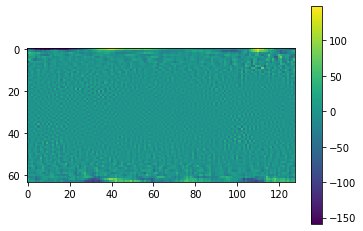

In [11]:
plt.imshow(image[0,:,:,74]-image2[0,:,:,74])
plt.colorbar()

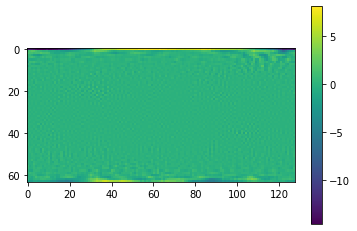

In [12]:
plt.imshow(image[0,:,:,14]-image2[0,:,:,14])
plt.colorbar()

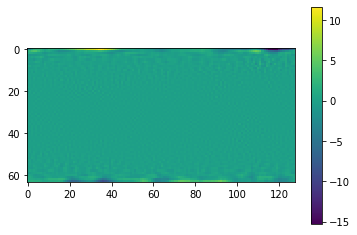

In [13]:
plt.imshow(image[0,:,:,24]-image2[0,:,:,24])
plt.colorbar()

W1202 16:43:56.410600 4653870528 registry.py:293] Calling the getitem method from a UnitRegistry is deprecated. use `parse_expression` method or use the registry as a callable.


norm ratio btw ageo and wind for dataset :
 0.22944512306594522


W1202 16:44:28.181452 4653870528 registry.py:293] Calling the getitem method from a UnitRegistry is deprecated. use `parse_expression` method or use the registry as a callable.
/Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


norm ratio btw ageo and wind for generated fields :
 0.6134528414623307


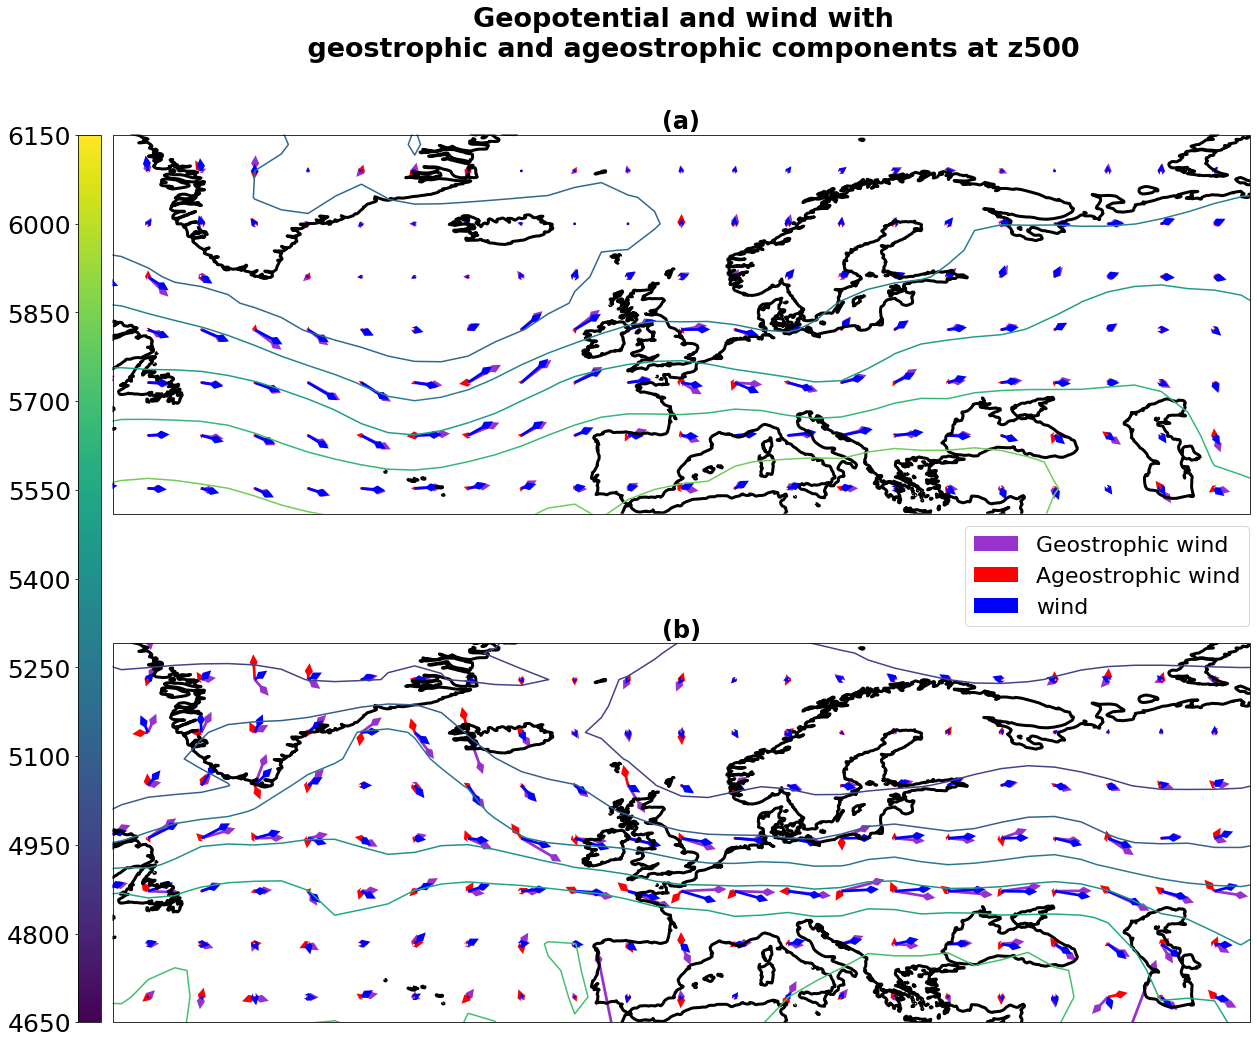

In [14]:
rel_data, rel_gen = geo_wind_explained(X_train, image, lon, lats, atm_lvl=4,
                   scale=10, lvls=10, extent=extent, method_ageo='', quiver_slices = slice(None, -1, 2))

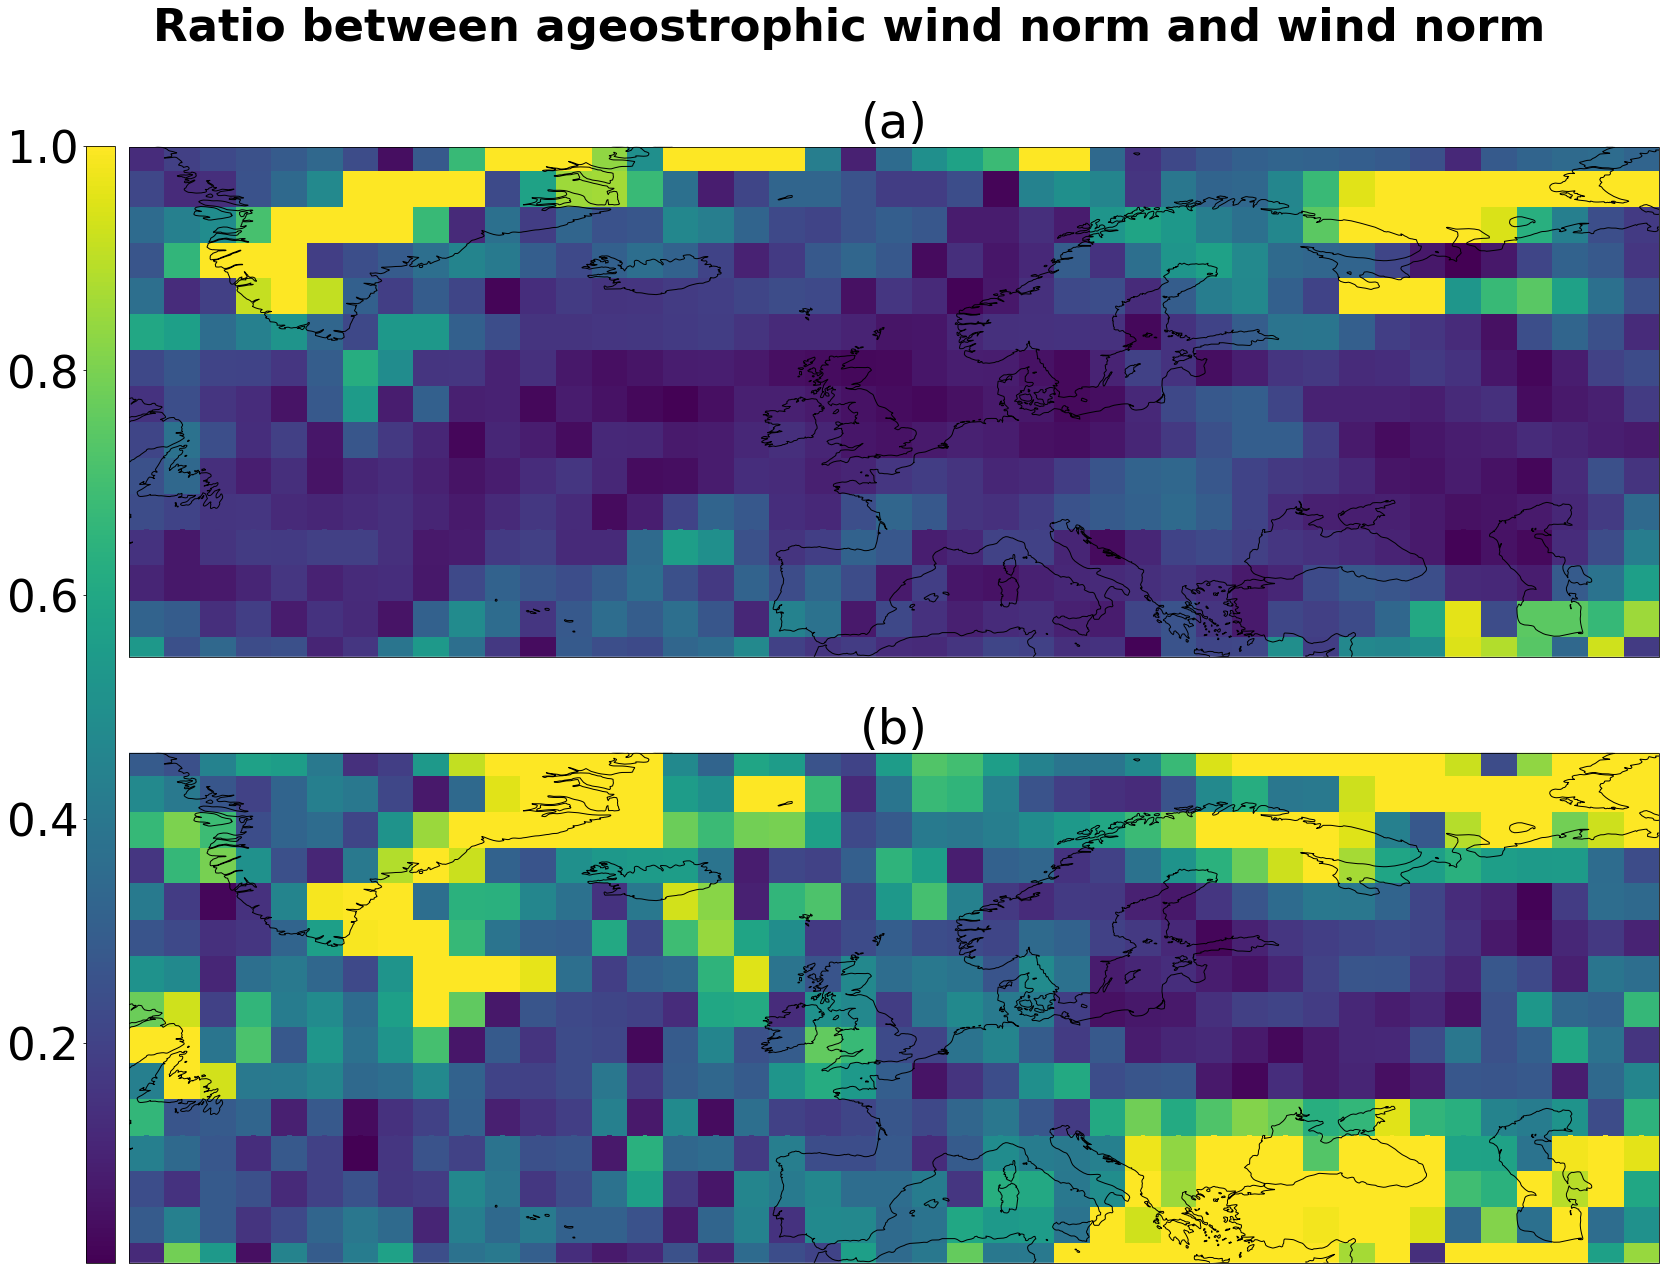

In [15]:
fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize=(25,20),
                           subplot_kw={'projection': ccrs.PlateCarree(central_longitude = 0.)})
plt.suptitle('Ratio between ageostrophic wind norm and wind norm', fontsize = 45, fontweight='bold')
plt.subplots_adjust(top=0.89, bottom=0.1,right=0.95, left=0.1, wspace=0.1, hspace=0.14)
ax=axs[0]
ax.set_title('(a)', fontsize=48)
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.coastlines(linewidth = 1.)
im = ax.imshow( rel_data, cmap='viridis', transform=ccrs.PlateCarree(central_longitude=360.), vmax=1)
posn = ax.get_position()
#cax21 = fig.add_axes([posn.x0 - 2*0.008, posn.y0, 0.008, posn.height])
#cbar = plt.colorbar(im, cax = cax21)
#cbar.ax.tick_params(labelsize=30)
#cax21.yaxis.set_ticks_position('left')
plt.grid(False)

ax=axs[1]
ax.set_title('(b)', fontsize=48)
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.coastlines(linewidth = 1.)
im2 = ax.imshow( rel_gen, cmap='viridis', transform=ccrs.PlateCarree(central_longitude=360.), vmax=1)
posn = ax.get_position()
cax21 = fig.add_axes([posn.x0 - 3*0.008, posn.y0, 2*0.008, 2.19*posn.height])
cbar = plt.colorbar(im2, cax = cax21)
cax21.tick_params(labelsize=45)
cax21.yaxis.set_ticks_position('left')
plt.grid(False)

plt.savefig('../figures/relative_err_norm_winds.pdf')  

## Debug part

In [16]:

def geo_wind_explained_debug(geopot1, geopot2, lon, lats, atm_lvl, scale=10, lvls=10, extent=None, method_ageo='metpy', 
                            quiver_slices = slice(None, None, 3)):
    from metpy.units import units
    geopot, lons = cartopy.util.add_cyclic_point(geopot1, coord=lon, axis=2)
    geopot = geopot
    phi, theta = np.meshgrid(lons,lats)
    
    ureg = UnitRegistry()
    lats_p = lats*ureg.deg
    lons_p = lons*ureg.deg

    phi, theta = np.meshgrid(lons,lats)*ureg.deg
    
    f = mpcalc.coriolis_parameter(theta)

    dx, dy = mpcalc.lat_lon_grid_deltas(phi, theta)

    heights = geopot*ureg.hPa
    heights = xr.DataArray(geopot[0,:,:, 70+atm_lvl]*units['hPa'], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
    
    u_geo, v_geo = mpcalc.geostrophic_wind(heights, f, dx, dy, dim_order='yx')
    
    
    u_wind = geopot[0,:,:,10+atm_lvl]
    v_wind = geopot[0,:,:,20+atm_lvl]
    ageo_wind_u = u_wind - u_geo.m
    ageo_wind_v = v_wind - v_geo.m
    
    if method_ageo == 'metpy':
        
        u = xr.DataArray(geopot[0,:,:, 10+atm_lvl], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
        v = xr.DataArray(geopot[0,:,:, 20+atm_lvl], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
        
        u = u * units.meter / units.second
        v = v * units.meter / units.second
        
        print(u)
        u_ageo, v_ageo = mpcalc.ageostrophic_wind(heights, f, dx, dy, u, v)
        ageo_wind_u = u_ageo.m
        ageo_wind_v = v_ageo.m
    else:
        ageo_wind_u = u_wind - u_geo.m
        ageo_wind_v = v_wind - v_geo.m


    
    quiver_kwargs = {'headlength': 3, 'headwidth': 3, 'angles': 'xy', 'scale_units': 'xy',
                 'scale': scale}
    quiver_kwargs2 = {'headlength': 3, 'headwidth': 3, 'angles': 'xy', 'scale_units': 'xy',
                 'scale': scale}
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(20,15),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude = 180.)})
    plt.subplots_adjust(top=0.9, bottom=0.001,right=0.89, left=0.1, wspace=0.1, hspace=0.1)
    axc=ax[0]
    if extent is not None:
        axc.set_extent(extent, crs=ccrs.PlateCarree(central_longitude=0.))
    axc.coastlines(linewidth = 3.)
    axc.set_title('(a)', fontsize = 18)
    
    cim1 = axc.contour(lons, lats, geopot[0,:,:,70+atm_lvl], levels = lvls, cmap = 'viridis')


    alpha = 1.
    geo = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                    u_geo[quiver_slices, quiver_slices].m, v_geo[quiver_slices, quiver_slices].m, alpha=alpha,
                    color='darkorchid', **quiver_kwargs2)
    
    ageo = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                     ageo_wind_u[quiver_slices, quiver_slices], ageo_wind_v[quiver_slices, quiver_slices], alpha=alpha,
                     color='red', **quiver_kwargs)
    
    wind = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                 u_wind[quiver_slices, quiver_slices], v_wind[quiver_slices, quiver_slices], alpha=alpha,
                 color='blue', **quiver_kwargs)
    
    #axc.legend([geo,ageo,wind],['Geostrophic wind', 'Ageostrophic wind','wind'], loc=6,
    #           bbox_to_anchor=(1.0, -0.15, 0., 0.), fontsize = 16)
    
    norm_w = np.sqrt(u_wind**2+v_wind**2)
    norm_g = np.sqrt(u_geo**2+v_geo**2)
    norm_a = np.sqrt(ageo_wind_u**2+ageo_wind_v**2)
    relative_err_data = norm_a/norm_w
    print('norm ratio btw ageo and wind for dataset :\n', np.mean(relative_err_data[16,120:]))

    
    ##############################################################################
    
    
    geopot, lons = cartopy.util.add_cyclic_point(geopot2, coord=lon, axis=2)
    geopot = geopot
    phi, theta = np.meshgrid(lons,lats)
    
    ureg = UnitRegistry()
    lats_p = lats*ureg.deg
    lons_p = lons*ureg.deg

    phi, theta = np.meshgrid(lons,lats)*ureg.deg
    print('phi', phi)
    f = mpcalc.coriolis_parameter(theta)

    dx, dy = mpcalc.lat_lon_grid_deltas(phi, theta)

    heights = geopot*ureg.hPa
    heights = xr.DataArray(geopot[0,:,:, 70+atm_lvl]*units['hPa'], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
    
    u_geo, v_geo = mpcalc.geostrophic_wind(heights, f, dx, dy)
    
    
    u_wind = geopot[0,:,:,10+atm_lvl]
    v_wind = geopot[0,:,:,20+atm_lvl]
    ageo_wind_u = u_wind - u_geo.m
    ageo_wind_v = v_wind - v_geo.m
    
    if method_ageo == 'metpy':
        
        u = xr.DataArray(geopot[0,:,:, 10+atm_lvl], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
        v = xr.DataArray(geopot[0,:,:, 20+atm_lvl], dims=("lat", "lon"), coords={"lon": lons_p, "lat" : lats_p})
        
        u = u * units.meter / units.second
        v = v * units.meter / units.second
        
        print(u)
        u_ageo, v_ageo = mpcalc.ageostrophic_wind(heights, f, dx, dy, u, v)
        ageo_wind_u = u_ageo.m
        ageo_wind_v = v_ageo.m
    else:
        ageo_wind_u = u_wind - u_geo.m
        ageo_wind_v = v_wind - v_geo.m


    axc=ax[1]
    if extent is not None:
        axc.set_extent(extent, crs=ccrs.PlateCarree(central_longitude=0.))
    axc.coastlines(linewidth = 3.)
    axc.set_title('(b)', fontsize = 18)
    
    cim2 = axc.contour(lons, lats, geopot[0,:,:,70+atm_lvl], levels = lvls, cmap = 'viridis', linewidth=(7,))


    alpha = 1.
    geo = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                    u_geo[quiver_slices, quiver_slices].m, v_geo[quiver_slices, quiver_slices].m, alpha=alpha,
                    color='darkorchid', **quiver_kwargs2)
    
    ageo = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                     ageo_wind_u[quiver_slices, quiver_slices], ageo_wind_v[quiver_slices, quiver_slices], alpha=alpha,
                     color='red', **quiver_kwargs)
    
    wind = axc.quiver(phi[quiver_slices, quiver_slices].m, theta[quiver_slices, quiver_slices].m,
                 u_wind[quiver_slices, quiver_slices], v_wind[quiver_slices, quiver_slices], alpha=alpha,
                 color='blue', **quiver_kwargs)
    

    
    norm_w = np.sqrt(u_wind**2+v_wind**2)
    norm_g = np.sqrt(u_geo**2+v_geo**2)
    norm_a = np.sqrt(ageo_wind_u**2+ageo_wind_v**2)
    #
    relative_err_gen = norm_a/norm_w
    print('norm ratio btw ageo and wind for generated fields :\n', np.mean(relative_err_gen[16,120:]))

    #
    posn2 = axc.get_position()
    cax22 = fig.add_axes([posn2.x0 - 3*0.008, posn2.y0, 2*0.008, 2.42*posn2.height])
    cbar = plt.colorbar(cim1, cax = cax22)
    plt.suptitle(f"Geopotential and wind with \n geostrophic and ageostrophic components at z{atm_lvl+1}00", fontsize=19,
                fontweight='bold')
    cax22.yaxis.set_ticks_position('left')
    axc.legend([geo,ageo,wind],['Geostrophic wind', 'Ageostrophic wind','wind'], loc=6,
               bbox_to_anchor=(0.43, posn2.y0+posn2.height*0.5, 2., 2.), fontsize = 16)
    plt.savefig('../figures/quiver_winds.pdf')  
    return relative_err_data, relative_err_gen


W1202 16:45:30.037271 4653870528 registry.py:293] Calling the getitem method from a UnitRegistry is deprecated. use `parse_expression` method or use the registry as a callable.


norm ratio btw ageo and wind for dataset :
 0.13652555044982764
phi [[0.0 2.8125 5.625 ... 354.375 357.1875 360.0] [0.0 2.8125 5.625 ... 354.375 357.1875 360.0] [0.0 2.8125 5.625 ... 354.375 357.1875 360.0] ... [0.0 2.8125 5.625 ... 354.375 357.1875 360.0] [0.0 2.8125 5.625 ... 354.375 357.1875 360.0] [0.0 2.8125 5.625 ... 354.375 357.1875 360.0]] degree


W1202 16:45:58.390652 4653870528 registry.py:293] Calling the getitem method from a UnitRegistry is deprecated. use `parse_expression` method or use the registry as a callable.
/Users/besombes/Work/python/Cerfacs/python_env/py36_keras_tf/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linewidth'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


norm ratio btw ageo and wind for generated fields :
 0.9660158983915041


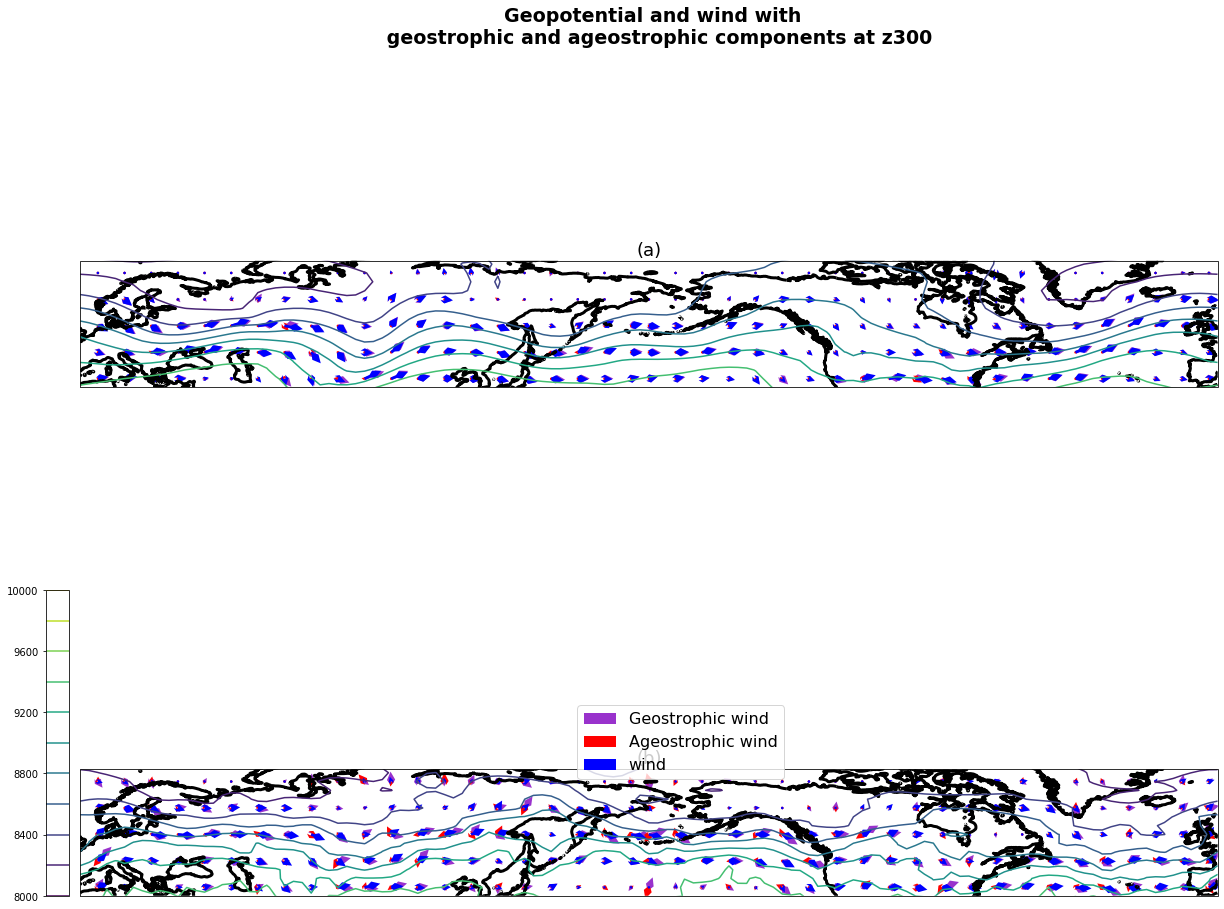

In [17]:
rel_data, rel_gen = geo_wind_explained_debug(X_train, image, lon, lats, atm_lvl=2,
                   scale=10, lvls=10, extent=extent, method_ageo='', quiver_slices = slice(None, -1, 3))

In [18]:
plt.figure()
plt.imshow(dz[0])
plt.colorbar()
plt.figure()
plt.imshow(dz[1])
plt.colorbar()

NameError: name 'dz' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
dzdtheta, dzdphi = dz[1]*1./r, dz[0]*1./(np.sin(theta+1e-2))
dzdr = np.zeros((dzdtheta.shape))

In [ ]:
plt.figure()
plt.imshow(dzdtheta)
plt.colorbar()
plt.figure()
plt.imshow(dzdphi[:,:])
plt.colorbar()

plt.figure()
plt.plot(1./np.sin(lats))

In [ ]:
gradz = np.concatenate((np.expand_dims(dzdr, axis=0), np.expand_dims(dzdtheta, axis=0), np.expand_dims(dzdphi, axis=0)), axis=0)
print(gradz.shape)
k = np.zeros((gradz.shape))
k[0,:,:] = 1.
print(gradz.shape)

In [ ]:
f = 1.
res=np.zeros((3,64,129))
for i in range(64):
    for j in range(129):
        res[:,i,j] = np.cross(k[:,i,j],gradz[:,i,j])
print(np.mean(res, axis=(1,2)))
print(res[0].shape)
print(res[1].shape)
print(res[2].shape)

In [ ]:
u_wind = cartopy.util.add_cyclic_point(X_train[ind,:,:,14], coord=lons_n, axis=1)[0]
v_wind = cartopy.util.add_cyclic_point(X_train[ind,:,:,24], coord=lons_n, axis=1)[0]
ageo_wind_u = np.asarray(u_wind) - np.asarray(res[1,:,:])
ageo_wind_v = np.asarray(v_wind) - np.asarray(res[2,:,:])
geo_wind_u = res[1,:,:]
geo_wind_v = res[2,:,:]

print(geo_wind_u.shape)
print(geo_wind_v.shape)
print(u_wind.shape)
print(v_wind.shape)
print(ageo_wind_u.shape)
print(ageo_wind_v.shape)

#geopot, lons = cartopy.util.add_cyclic_point(X_train[ind,:,:,74], coord=lons, axis=1)


#u_windg, v_windg = np.mean(fk_imgs[:,:,:,field-60], axis=0), np.mean(fk_imgs[:,:,:,field-50], axis=0)
#ageo_wind_ug = np.asarray(u_windg) - np.asarray(geo_wind_ug)
#ageo_wind_vg = np.asarray(v_windg) - np.asarray(geo_wind_vg)

In [ ]:
print(type(geo_wind_u))
plt.figure()
plt.imshow(geo_wind_u)
plt.colorbar()

plt.figure()
plt.imshow(geo_wind_v)
plt.colorbar()

plt.figure()
plt.hist(geo_wind_u.reshape(-1), bins=100)

In [ ]:
X = res
lon_2d, lat_2d = np.meshgrid(lons, lats)
print(lon_2d.shape)
print(lat_2d.shape)

fig = plt.figure(figsize=(15, 10))

# Add the map and set the extent
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-105., -93., 35., 43.])
#ax.background_patch.set_fill(False)

# Add state boundaries to plot
#ax.add_feature(cfeature.STATES, edgecolor='white', linewidth=2)

# Contour the heights every 10 m
#contours = np.arange(10, 200, 10)
#c = plt.contour(lons, lats, np.mean(X[:,:,:], axis=0), levels=15,
#               colors='red', linewidths=1)
quiver_slices = (slice(None, None, 2), slice(None, None, 2))
quiver_kwargs = {'headlength': 3, 'headwidth': 3, 'angles': 'uv', 'scale_units': 'xy',
                 'scale': 1}

# Plot the wind vectors

fig = plt.figure(figsize=(15, 10))
geo = plt.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                geo_wind_u[quiver_slices], geo_wind_v[quiver_slices],
                color='darkorchid', **quiver_kwargs)
fig = plt.figure(figsize=(15, 10))
ageo = plt.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 ageo_wind_u[quiver_slices], ageo_wind_v[quiver_slices],
                 color='lime', **quiver_kwargs)
fig = plt.figure(figsize=(15, 10))
wind = plt.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 u_wind[quiver_slices], v_wind[quiver_slices],
                 color='blue', **quiver_kwargs)
plt.legend(['wind', 'Geostrophic wind', 'Ageostrophic wind'])
# Add a title to the plot
#plt.title('1000mb Geopotential Heights(m), Wind(blue), Geostrophic Wind(purple), and \n'
#          'Ageostrophic Wind(green) for {0:%d %B %Y %H:%MZ}'.format(time),
#          color='white', size=14)
#plt.savefig('./fig_82c/geo_wind.pdf')
plt.show()

In [ ]:
ind = 4115

fig, axc = plt.subplots(nrows = 1, ncols = 1, figsize=(15,20),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude = 0.)})

#ax = ax.reshape(-1)
#fig.suptitle(f'Geostrophic wind (z800)', fontsize = 24, fontweight = fontweight)
#fig.subplots_adjust(left=0.1,right=.9, wspace = 0.35, hspace = 0.2)


#axc = ax[0]
axc.set_extent([-60, 60, 20, 88], crs=ccrs.PlateCarree())
axc.coastlines(linewidth = 1.)
axc.set_title('(a)', fontsize = 18)
cim1 = axc.contourf(lons, lats, geopot, levels = 8, cmap = 'viridis',
                   transform=ccrs.PlateCarree(central_longitude=360.))

#magnitude = (X_train[ind,:,:,wind_idx] ** 2 + X_train[ind,:,:,wind_idx+N_lvls] ** 2) ** 0.5
#sp = axc.streamplot(lon,lat, X_train[ind,:,:,wind_idx], X_train[ind,:,:,wind_idx+N_lvls], cmap = 'Reds',
#               transform=ccrs.PlateCarree(central_longitude=360.),linewidth=.95, density=2.5, color=magnitude)
#im1 = sp.lines

geo = axc.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                geo_wind_u[quiver_slices], geo_wind_v[quiver_slices],
                color='darkorchid', **quiver_kwargs, transform=ccrs.PlateCarree(central_longitude=360.))

ageo = axc.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 ageo_wind_u[quiver_slices], ageo_wind_v[quiver_slices],
                 color='lime', **quiver_kwargs, transform=ccrs.PlateCarree(central_longitude=360.))

wind = axc.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 u_wind[quiver_slices], v_wind[quiver_slices],
                 color='blue', **quiver_kwargs, transform=ccrs.PlateCarree(central_longitude=360.))

axc.legend([geo,ageo,wind],['Geostrophic wind', 'Ageostrophic wind','wind'])


posn = axc.get_position()
cax21 = fig.add_axes([posn.x0 - 2*0.008, posn.y0, 0.008, posn.height])
cbar = plt.colorbar(cim1, cax = cax21)
#cax21.ticklabel_format( axis='both', style='sci',scilimits=(0,0), useOffset=None, useLocale=None, useMathText=None)
cax21.yaxis.set_ticks_position('left')


#axc = plt.subplot(212)
#axc2 = ax[1]
#axc2.set_extent([-60, 60, 20, 88], crs=ccrs.PlateCarree())
#axc2.set_title('(b)', fontsize = 18)
##axc = [1].axes(projection=ccrs.PlateCarree(central_longitude=0.))
#axc2.coastlines(linewidth = 1.)
#cim2 = axc2.contourf(lon, lat, im[0,:,:,temp_idx]*scaling[temp_idx,1]+scaling[temp_idx,0], vmin=gmin, vmax=gmax,
#                     levels = cim1.levels, cmap = 'viridis', transform=ccrs.PlateCarree(central_longitude=360.))
#
#magnitude = (im[0,:,:,wind_idx] ** 2 + im[0,:,:,wind_idx+N_lvls] ** 2) ** 0.5
#sp = axc2.streamplot(lon,lat, im[0,:,:,wind_idx], im[0,:,:,wind_idx+N_lvls], cmap = 'Reds',
#               transform=ccrs.PlateCarree(central_longitude=360.),linewidth=0.95, density=2.5, color=magnitude)
#im2 = sp.lines
#
#posn = axc2.get_position()
#cax12 = fig.add_axes([posn.x0 + posn.width + 0.008, posn.y0, 0.008, posn.height])
#cbar = plt.colorbar(im1, cax = cax12)
#cax12.ticklabel_format( axis='both', style='sci',scilimits=(0,0), useOffset=None, useLocale=None, useMathText=None)
##cax12.yaxis.set_ticks_position('left')
#
#posn = axc2.get_position()
#cax22 = fig.add_axes([posn.x0 - 2*0.008, posn.y0, 0.008, posn.height])
#cbar = plt.colorbar(cim2, cax = cax22)
##cax22.ticklabel_format( axis='both', style='sci',scilimits=(0,0), useOffset=None, useLocale=None, useMathText=None)
#cax22.yaxis.set_ticks_position('left')
#plt.savefig(f'./fig_82c/wind_geo_ageo_z500.pdf', bbox='tight')

In [ ]:
norm_w = np.sqrt(u_wind**2+v_wind**2)
norm_g = np.sqrt(geo_wind_u**2+geo_wind_v**2)
norm_a = np.sqrt(ageo_wind_u**2+ageo_wind_v**2)

relative_err = (norm_g-norm_w)/(np.abs(norm_w))

print(np.mean(relative_err))

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(15,20),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude = 0.)})

ax.set_extent([-60, 60, 20, 88], crs=ccrs.PlateCarree())
ax.coastlines(linewidth = 1.)
im = plt.imshow(relative_err, cmap='viridis', transform=ccrs.PlateCarree(central_longitude=360.))
posn = axc.get_position()
cax21 = fig.add_axes([posn.x0 - 2*0.008, posn.y0, 0.008, posn.height])
cbar = plt.colorbar(im, cax = cax21)
cax21.yaxis.set_ticks_position('left')
plt.grid(False)

In [ ]:
import metpy.calc as mpcalc
from metpy.units import units
print(X.shape)
lon_2d, lat_2d = np.meshgrid(lons, lats)

print(lons, lats)
dx, dy = mpcalc.lat_lon_grid_deltas(lon_2d, lat_2d)
print(dx, dy)
g = 9.81
f = mpcalc.coriolis_parameter(np.deg2rad(lat_2d)).to('1/s')
geo_wind_u, geo_wind_v = mpcalc.geostrophic_wind(np.mean(X[:,:,:], axis=0) * units.m, f, dx, dy)
geo_wind_u = geo_wind_u
geo_wind_v = geo_wind_v
#ug = -g/f*np.gradient()
print(np.asarray(geo_wind_u))
np.save('./geo_wind_u', np.asarray(geo_wind_u))
np.save('./geo_wind_v', np.asarray(geo_wind_v))


geo_wind_ug, geo_wind_vg = mpcalc.geostrophic_wind(np.mean(Xg[:,:,:], axis=0) * units.m, f, dx, dy)
geo_wind_ug = geo_wind_ug
geo_wind_vg = geo_wind_vg
#ug = -g/f*np.gradient()
print(np.asarray(geo_wind_u))
np.save('./geo_wind_ug', np.asarray(geo_wind_ug))
np.save('./geo_wind_vg', np.asarray(geo_wind_vg))

In [ ]:
u_wind, v_wind = np.mean(X_train[:,:,:,field-60], axis=0), np.mean(X_train[:,:,:,field-50], axis=0)
ageo_wind_u = np.asarray(u_wind) - np.asarray(geo_wind_u)
ageo_wind_v = np.asarray(v_wind) - np.asarray(geo_wind_v)


u_windg, v_windg = np.mean(fk_imgs[:,:,:,field-60], axis=0), np.mean(fk_imgs[:,:,:,field-50], axis=0)
ageo_wind_ug = np.asarray(u_windg) - np.asarray(geo_wind_ug)
ageo_wind_vg = np.asarray(v_windg) - np.asarray(geo_wind_vg)


In [ ]:
#print(u_wind, v_wind, geo_wind_u)

In [ ]:
fig = plt.figure(figsize=(15, 10))

# Add the map and set the extent
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-105., -93., 35., 43.])
#ax.background_patch.set_fill(False)

# Add state boundaries to plot
#ax.add_feature(cfeature.STATES, edgecolor='white', linewidth=2)

# Contour the heights every 10 m
#contours = np.arange(10, 200, 10)
c = plt.contour(lons, lats, np.mean(X[:,:,:], axis=0), levels=15,
               colors='red', linewidths=1)
quiver_slices = (slice(None, None, 2), slice(None, None, 2))
quiver_kwargs = {'headlength': 4, 'headwidth': 3, 'angles': 'uv', 'scale_units': 'xy',
                 'scale': 5}

# Plot the wind vectors


geo = plt.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                geo_wind_u[quiver_slices], geo_wind_v[quiver_slices],
                color='darkorchid', **quiver_kwargs)
ageo = plt.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 ageo_wind_u[quiver_slices], ageo_wind_v[quiver_slices],
                 color='lime', **quiver_kwargs)
wind = plt.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 u_wind[quiver_slices], v_wind[quiver_slices],
                 color='blue', **quiver_kwargs)
plt.legend(['wind', 'Geostrophic wind', 'Ageostrophic wind'])
# Add a title to the plot
#plt.title('1000mb Geopotential Heights(m), Wind(blue), Geostrophic Wind(purple), and \n'
#          'Ageostrophic Wind(green) for {0:%d %B %Y %H:%MZ}'.format(time),
#          color='white', size=14)
#plt.savefig('./fig_82c/geo_wind.pdf')
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 10))

# Add the map and set the extent
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_extent([-105., -93., 35., 43.])
#ax.background_patch.set_fill(False)

# Add state boundaries to plot
#ax.add_feature(cfeature.STATES, edgecolor='white', linewidth=2)

# Contour the heights every 10 m
#contours = np.arange(10, 200, 10)
c = plt.contour(lons, lats, np.mean(Xg[:,:,:], axis=0), levels=10,
               colors='red', linewidths=1)
quiver_slices = (slice(None, None, 2), slice(None, None, 2))
quiver_kwargs = {'headlength': 4, 'headwidth': 3, 'angles': 'uv', 'scale_units': 'xy',
                 'scale': 5}

# Plot the wind vectors


geo = plt.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                geo_wind_ug[quiver_slices], geo_wind_vg[quiver_slices],
                color='darkorchid', **quiver_kwargs)
ageo = plt.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 ageo_wind_ug[quiver_slices], ageo_wind_vg[quiver_slices],
                 color='lime', **quiver_kwargs)
wind = plt.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 u_windg[quiver_slices], v_windg[quiver_slices],
                 color='blue', **quiver_kwargs)
plt.legend(['wind', 'Geostrophic wind', 'Ageostrophic wind'])
# Add a title to the plot
#plt.title('1000mb Geopotential Heights(m), Wind(blue), Geostrophic Wind(purple), and \n'
#          'Ageostrophic Wind(green) for {0:%d %B %Y %H:%MZ}'.format(time),
#          color='white', size=14)
#plt.savefig('./fig_82c/geo_wind.pdf')
plt.show()

In [ ]:
fig, axs = plt.subplots(2,1, figsize=(15,15))
plt.suptitle(f'Geostrophic and ageostrophic wind over {years} years', fontweight='bold', fontsize=22)
plt.subplots_adjust(top=0.93)
#axs[0].coastlines(linewidth=2.)
ax = axs[0]
ax.grid(False)
ax.set_title(f'(a)', fontsize=18, fontweight='bold')
c = ax.contour(lons, lats, np.mean(X[:,:,:], axis=0), levels=10,
               colors='red', linewidths=1)
quiver_slices = (slice(None, None, 2), slice(None, None, 2))
quiver_kwargs = {'headlength': 4, 'headwidth': 3, 'angles': 'uv', 'scale_units': 'xy',
                 'scale': 10}

# Plot the wind vectors


geo = ax.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                geo_wind_u[quiver_slices], geo_wind_v[quiver_slices],
                color='darkorchid', **quiver_kwargs)
ageo = ax.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 ageo_wind_u[quiver_slices], ageo_wind_v[quiver_slices],
                 color='lime', **quiver_kwargs)
wind = ax.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 u_wind[quiver_slices], v_wind[quiver_slices],
                 color='blue', **quiver_kwargs)
ax.legend(['wind', 'Geostrophic wind', 'Ageostrophic wind'])


ax2 = axs[1]
ax2.grid(False)
ax2.set_title(f'(b)', fontsize=18, fontweight='bold')

c = ax2.contour(lons, lats, np.mean(Xg[:,:,:], axis=0), levels=10,
               colors='red', linewidths=1)
quiver_slices = (slice(None, None, 2), slice(None, None, 2))
quiver_kwargs = {'headlength': 4, 'headwidth': 3, 'angles': 'uv', 'scale_units': 'xy',
                 'scale': 10}

# Plot the wind vectors


geo = ax2.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                geo_wind_ug[quiver_slices], geo_wind_vg[quiver_slices],
                color='darkorchid', **quiver_kwargs)
ageo = ax2.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 ageo_wind_ug[quiver_slices], ageo_wind_vg[quiver_slices],
                 color='lime', **quiver_kwargs)
wind = ax2.quiver(lon_2d[quiver_slices], lat_2d[quiver_slices],
                 u_windg[quiver_slices], v_windg[quiver_slices],
                 color='blue', **quiver_kwargs)
ax2.legend(['wind', 'Geostrophic wind', 'Ageostrophic wind'])
#plt.axis('off')
#plt.tight_layout()

plt.savefig(f'./fig_82c/geo_wind_{years}.pdf')
